In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('new_data.csv')
df

,VALUE DATE,ID,EVAL MID YIELD,COMPOSITE LIQUIDITY SCORE (T-1),COUPON FREQUENCY,NEXT COUPON RATE,REMAINING_TENURE_INT,CALLABLE/PUTTABLE,MODIFIED DURATION,EVAL MID PRICE
0,2019-08-01,0,3.581,0.0,2,5.06,6,0,0.358,100.521
1,2019-09-03,0,3.517,0.0,2,5.06,3,0,0.270,100.406
2,2019-10-01,0,3.429,0.0,2,5.06,3,0,0.195,100.307
3,2019-11-01,0,3.435,0.0,2,5.06,3,0,0.111,100.172
4,2019-08-01,1,3.772,0.0,2,5.17,24,0,1.299,101.832
...,...,...,...,...,...,...,...,...,...,...
14013,2020-10-01,1138,5.748,1.7,2,6.00,300,1,4.981,101.262
14014,2020-11-02,1138,5.680,2.3,2,6.00,300,1,4.900,101.580
14015,2020-09-01,1139,5.866,3.3,2,5.70,300,1,5.211,99.113
14016,2020-10-01,1139,5.839,2.7,2,5.70,300,1,5.286,99.259


### Add seasonal indicator using month 

In [3]:
df['MONTH'] = pd.DatetimeIndex(df['VALUE DATE']).month
df

,VALUE DATE,ID,EVAL MID YIELD,COMPOSITE LIQUIDITY SCORE (T-1),COUPON FREQUENCY,NEXT COUPON RATE,REMAINING_TENURE_INT,CALLABLE/PUTTABLE,MODIFIED DURATION,EVAL MID PRICE,MONTH
0,2019-08-01,0,3.581,0.0,2,5.06,6,0,0.358,100.521,8
1,2019-09-03,0,3.517,0.0,2,5.06,3,0,0.270,100.406,9
2,2019-10-01,0,3.429,0.0,2,5.06,3,0,0.195,100.307,10
3,2019-11-01,0,3.435,0.0,2,5.06,3,0,0.111,100.172,11
4,2019-08-01,1,3.772,0.0,2,5.17,24,0,1.299,101.832,8
...,...,...,...,...,...,...,...,...,...,...,...
14013,2020-10-01,1138,5.748,1.7,2,6.00,300,1,4.981,101.262,10
14014,2020-11-02,1138,5.680,2.3,2,6.00,300,1,4.900,101.580,11
14015,2020-09-01,1139,5.866,3.3,2,5.70,300,1,5.211,99.113,9
14016,2020-10-01,1139,5.839,2.7,2,5.70,300,1,5.286,99.259,10


In [4]:
df = df.sort_values(['ID','VALUE DATE'])

### Add time series data for price

In [5]:
df_new = pd.DataFrame()

for index in set(df['ID']): 
    df_testing  = df.loc[df['ID']==index,:]
    df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
    df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
    df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
    df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
    df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
    df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
    df_new = pd.concat([df_new,df_testing],axis=0)

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
<ipython-input-5-d66358be061b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

<ipython-input-5-d66358be061b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<ipython-input-5-d66358be061b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
<ipython-input-5-d66358be061b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
<ipython-input-5-d66358be061b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [11]:
df_new.shape

(14018, 17)

In [12]:
import matplotlib.pyplot as plt

In [13]:
df_show= df_new[df_new['ID']==4]
df_show.shape

(15, 17)

### showing one of the time series trend

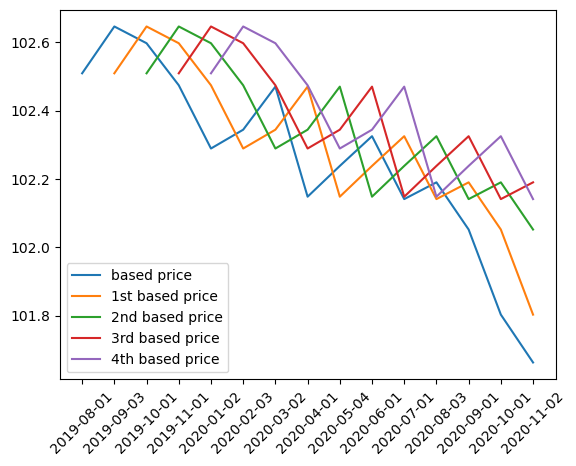

In [14]:
plt.plot(df_show['VALUE DATE'], df_show['EVAL MID PRICE'], label='based price');
plt.plot(df_show['VALUE DATE'], df_show['PRICE_1'], label='1st based price');
plt.plot(df_show['VALUE DATE'], df_show['PRICE_2'], label='2nd based price');
plt.plot(df_show['VALUE DATE'], df_show['PRICE_3'], label='3rd based price');
plt.plot(df_show['VALUE DATE'], df_show['PRICE_4'], label='4th based price');
plt.xticks(rotation=45)
plt.legend()
plt.show()

### create output column

In [15]:
def series_to_supervise(df_new, s=1):
    shifted_df = df_new.shift(s)
    shifted_df.rename(columns= {'EVAL MID PRICE':'OUTPUT PRICE'}, inplace=True)
    y_out = shifted_df['OUTPUT PRICE']
    del shifted_df
    
    return pd.concat([df_new, y_out], axis=1)

In [16]:
grouped = df_new.groupby(['ID'])
grouped

In [17]:
final_data = []
for name, data in grouped:
    data_sup = series_to_supervise(data)
    data_sup.dropna(subset=['OUTPUT PRICE'], inplace=True)
    final_data.append(data_sup)

In [18]:
df_sup = pd.concat(final_data)
print(df_sup.shape)
df_sup.head(10)

(12878, 18)


,VALUE DATE,ID,EVAL MID YIELD,COMPOSITE LIQUIDITY SCORE (T-1),COUPON FREQUENCY,NEXT COUPON RATE,REMAINING_TENURE_INT,CALLABLE/PUTTABLE,MODIFIED DURATION,EVAL MID PRICE,MONTH,PRICE_1,PRICE_2,PRICE_3,PRICE_4,PRICE_5,PRICE_6,OUTPUT PRICE
1,2019-09-03,0,3.517,0.0,2,5.06,3,0,0.270,100.406,9,100.521,NaN,NaN,NaN,NaN,NaN,100.521
2,2019-10-01,0,3.429,0.0,2,5.06,3,0,0.195,100.307,10,100.406,100.521,NaN,NaN,NaN,NaN,100.406
3,2019-11-01,0,3.435,0.0,2,5.06,3,0,0.111,100.172,11,100.307,100.406,100.521,NaN,NaN,NaN,100.307
5,2019-09-03,1,3.650,0.0,2,5.17,24,0,1.211,101.864,9,101.832,NaN,NaN,NaN,NaN,NaN,101.832
6,2019-10-01,1,3.587,0.0,2,5.17,24,0,1.136,101.827,10,101.864,101.832,NaN,NaN,NaN,NaN,101.864
7,2019-11-01,1,3.599,0.0,2,5.17,24,0,1.052,101.688,11,101.827,101.864,101.832,NaN,NaN,NaN,101.827
8,2020-01-02,1,3.526,0.0,2,5.17,12,0,0.911,101.504,1,101.688,101.827,101.864,101.832,NaN,NaN,101.688
9,2020-02-03,1,3.375,3.0,2,5.17,12,0,0.826,101.491,2,101.504,101.688,101.827,101.864,101.832,NaN,101.504
10,2020-03-02,1,3.179,2.7,2,5.17,12,0,0.751,101.508,3,101.491,101.504,101.688,101.827,101.864,101.832,101.491
11,2020-04-01,1,3.237,2.7,2,5.17,12,0,0.670,101.310,4,101.508,101.491,101.504,101.688,101.827,101.864,101.508


In [19]:
df_sup[df_sup['ID']==2]

,VALUE DATE,ID,EVAL MID YIELD,COMPOSITE LIQUIDITY SCORE (T-1),COUPON FREQUENCY,NEXT COUPON RATE,REMAINING_TENURE_INT,CALLABLE/PUTTABLE,MODIFIED DURATION,EVAL MID PRICE,MONTH,PRICE_1,PRICE_2,PRICE_3,PRICE_4,PRICE_5,PRICE_6,OUTPUT PRICE
20,2019-09-03,2,3.587,0.0,2,5.12,12,0,0.747,101.152,9,101.203,NaN,NaN,NaN,NaN,NaN,101.203
21,2019-10-01,2,3.509,0.0,2,5.12,12,0,0.672,101.093,10,101.152,101.203,NaN,NaN,NaN,NaN,101.152
22,2019-11-01,2,3.541,0.0,2,5.12,12,0,0.588,100.942,11,101.093,101.152,101.203,NaN,NaN,NaN,101.093
23,2020-01-02,2,3.460,0.0,2,5.12,6,0,0.436,100.719,1,100.942,101.093,101.152,101.203,NaN,NaN,100.942
24,2020-02-03,2,3.313,0.0,2,5.12,6,0,0.351,100.625,2,100.719,100.942,101.093,101.152,101.203,NaN,100.719
25,2020-03-02,2,3.114,0.0,2,5.12,3,0,0.276,100.543,3,100.625,100.719,100.942,101.093,101.152,101.203,100.625
26,2020-04-01,2,3.097,0.0,2,5.12,3,0,0.195,100.385,4,100.543,100.625,100.719,100.942,101.093,101.152,100.543
27,2020-05-04,2,2.940,0.0,2,5.12,3,0,0.105,100.223,5,100.385,100.543,100.625,100.719,100.942,101.093,100.385
28,2020-06-01,2,2.687,0.0,2,5.12,3,0,0.029,100.068,6,100.223,100.385,100.543,100.625,100.719,100.942,100.223


In [20]:
df_sup.drop('ID', axis=1, inplace=True)
df_sup.drop('VALUE DATE',axis=1,inplace=True)

In [21]:
df_sup.fillna(0,inplace=True)

In [22]:
from sklearn.preprocessing import MinMaxScaler

#### confirm every features are in int/float 

In [23]:
df_sup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12878 entries, 1 to 14017
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EVAL MID YIELD                   12878 non-null  float64
 1   COMPOSITE LIQUIDITY SCORE (T-1)  12878 non-null  float64
 2   COUPON FREQUENCY                 12878 non-null  int64  
 3   NEXT COUPON RATE                 12878 non-null  float64
 4   REMAINING_TENURE_INT             12878 non-null  int64  
 5   CALLABLE/PUTTABLE                12878 non-null  int64  
 6   MODIFIED DURATION                12878 non-null  float64
 7   EVAL MID PRICE                   12878 non-null  float64
 8   MONTH                            12878 non-null  int64  
 9   PRICE_1                          12878 non-null  float64
 10  PRICE_2                          12878 non-null  float64
 11  PRICE_3                          12878 non-null  float64
 12  PRICE_4           

In [24]:
for index in set(df_new['ID']):
    df_show= df_new[df_new['ID']==index]
    plt.plot(df_show['VALUE DATE'], df_show['EVAL MID PRICE'], label='based price');

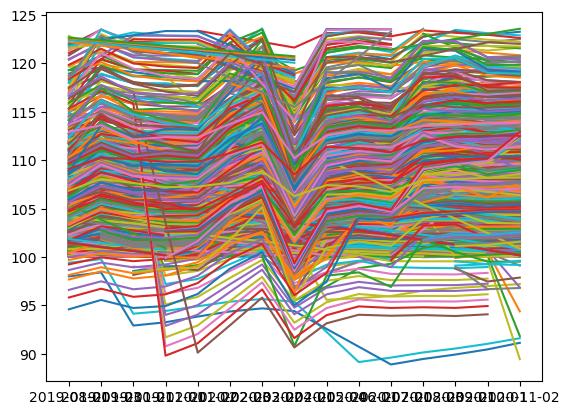

Text(0, 0.5, 'Bond Price')

In [25]:
plt.show()
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Bond Price')

In [26]:
df_sup.to_csv('new_data2.csv')

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(df)

data = scaler.fit_transform(df_sup)

data.shape

(12878, 16)

In [28]:
x = data[:, :-1] # every row of all column except last column
y = data[:, -1] # every row of last column

In [29]:
train_x, test_x = x[:10000, :], x[10000:, :]
train_y, test_y = y[:10000], y[10000:]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(10000, 1, 15) (10000,) (2878, 1, 15) (2878,)


## Model Building

In [30]:
!pip install tensorflow --quiet

In [31]:
from tensorflow.keras.layers import Dense,LSTM, Activation
from tensorflow.keras.models import Sequential

AttributeError: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'

In [6]:
from sklearn.model_selection import train_test_split
y = df['EVAL MID PRICE']
df = df.drop('EVAL MID PRICE',axis=1)
X = df
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [38]:
X_train

,VALUE DATE,ID,EVAL MID YIELD,COMPOSITE LIQUIDITY SCORE (T-1),COUPON FREQUENCY,NEXT COUPON RATE,REMAINING_TENURE_INT,MODIFIED DURATION,MONTH
11811,2020-01-02,957,3.684,3.3,2,4.40,120,6.159,1
3876,2020-10-01,336,2.398,0.0,2,4.33,24,1.864,10
7346,2020-03-02,625,2.991,0.0,2,4.20,24,1.450,3
4443,2020-10-01,377,2.577,2.3,2,3.07,60,4.076,10
11566,2020-11-02,940,2.441,0.0,2,8.60,24,1.079,11
...,...,...,...,...,...,...,...,...,...
661,2019-11-01,54,3.504,0.0,2,4.30,24,1.746,11
9091,2020-05-04,755,4.511,1.3,2,5.16,60,2.926,5
1056,2020-09-01,81,2.550,0.0,2,5.00,36,2.508,9
13558,2020-10-01,1092,3.588,2.3,2,5.29,180,8.566,10


In [40]:
df_testing =pd.read_csv('train2.csv')
df_testing.columns

Index(['id', 'bond_id', 'trade_price', 'weight', 'current_coupon',
       'time_to_maturity', 'is_callable', 'reporting_delay', 'trade_size',
       'trade_type', 'curve_based_price', 'received_time_diff_last1',
       'trade_price_last1', 'trade_size_last1', 'trade_type_last1',
       'curve_based_price_last1', 'received_time_diff_last2',
       'trade_price_last2', 'trade_size_last2', 'trade_type_last2',
       'curve_based_price_last2', 'received_time_diff_last3',
       'trade_price_last3', 'trade_size_last3', 'trade_type_last3',
       'curve_based_price_last3', 'received_time_diff_last4',
       'trade_price_last4', 'trade_size_last4', 'trade_type_last4',
       'curve_based_price_last4', 'received_time_diff_last5',
       'trade_price_last5', 'trade_size_last5', 'trade_type_last5',
       'curve_based_price_last5', 'received_time_diff_last6',
       'trade_price_last6', 'trade_size_last6', 'trade_type_last6',
       'curve_based_price_last6', 'received_time_diff_last7',
       '

In [66]:
df_show = df_testing[['id','bond_id','trade_price', 'weight', 'current_coupon',
       'time_to_maturity', 'is_callable', 'reporting_delay', 'trade_size',
       'trade_type','trade_price_last1','trade_price_last2','trade_price_last3','trade_price_last4',
          'trade_price_last5','trade_price_last6','trade_price_last7']]

In [77]:
df_show[df_show['bond_id']==1]

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,trade_price_last1,trade_price_last2,trade_price_last3,trade_price_last4,trade_price_last5,trade_price_last6,trade_price_last7
0,1,1,128.59600,11.316404,5.95,26.031126,0,1.731,120000,2,129.08900,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,126.67300,8.763446,5.95,26.016697,0,30.518,85000,4,128.59600,129.08900,NaN,NaN,NaN,NaN,NaN
2,3,1,126.88000,6.499730,5.95,26.008760,0,4.424,4200000,3,126.67300,128.59600,129.08900,NaN,NaN,NaN,NaN
3,4,1,126.36200,0.865854,5.95,26.008619,0,43.059,5000001,2,126.88000,126.67300,128.59600,129.08900,NaN,NaN,NaN
4,5,1,124.91800,11.938543,5.95,25.981840,0,6.332,10000,2,126.36200,126.88000,126.67300,128.59600,129.08900,NaN,NaN
5,6,1,128.89100,1.479307,5.95,25.981429,0,35.982,29000,4,124.91800,126.36200,126.88000,126.67300,128.59600,129.08900,NaN
6,7,1,126.06100,10.155838,5.95,25.962051,0,12.601,220000,3,128.89100,124.91800,126.36200,126.88000,126.67300,128.59600,129.08900
7,8,1,124.75700,7.567823,5.95,25.951291,0,0.631,1000000,3,126.06100,128.89100,124.91800,126.36200,126.88000,126.67300,128.59600
8,9,1,125.10100,0.469131,5.95,25.951249,0,2.091,400000,3,124.75700,126.06100,128.89100,124.91800,126.36200,126.88000,126.67300
9,10,1,126.26800,7.616851,5.95,25.940349,0,12.540,150000,3,125.10100,124.75700,126.06100,128.89100,124.91800,126.36200,126.88000


In [78]:
df_show2 = df_testing[['id','bond_id','trade_price', 'weight', 'current_coupon',
       'time_to_maturity', 'is_callable', 'reporting_delay', 'trade_size',
       'trade_type','received_time_diff_last1','received_time_diff_last2','received_time_diff_last3',
       'received_time_diff_last4','received_time_diff_last5','received_time_diff_last6','received_time_diff_last7']]

In [79]:
df_show2

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,received_time_diff_last1,received_time_diff_last2,received_time_diff_last3,received_time_diff_last4,received_time_diff_last5,received_time_diff_last6,received_time_diff_last7
0,1,1,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,758762,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,455028,1213791.0,NaN,NaN,NaN,NaN,NaN
2,3,1,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,250310,705339.0,1464101.0,NaN,NaN,NaN,NaN
3,4,1,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,4441,254752.0,709781.0,1468543.0,NaN,NaN,NaN
4,5,1,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,844484,848925.0,1099236.0,1554265.0,2313027.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762673,762674,915157,101.334,0.554384,5.75,10.005765,0,2.363,50000,3,1820,2397.0,2733.0,2848.0,2977.0,3363.0,3505.0
762674,762675,915157,101.303,0.261769,5.75,10.005752,0,154.395,500000,2,405,2225.0,2802.0,3138.0,3253.0,3382.0,3768.0
762675,762676,915157,101.503,0.321389,5.75,10.005733,0,48.938,3700000,4,611,1016.0,2837.0,3413.0,3750.0,3864.0,3993.0
762676,762677,915157,101.479,0.351248,5.75,10.005710,0,9.511,2000000,4,730,1342.0,1747.0,3567.0,4144.0,4480.0,4595.0


In [72]:
df_show.is_callable.value_counts()

0    677712
1     84966
Name: is_callable, dtype: int64

In [73]:
pd.read_csv('test.csv')

,id,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,762679,0.733639,1.30278,1.090694,0,68.135,2250000,2,98.521799,3188,...,869248.0,98.000,100000.0,4.0,98.358220,883612.0,97.050000,100000.0,2.0,98.315355
1,762680,0.403570,8.50000,7.472191,0,2.421,3000,2,119.292424,964,...,150886.0,115.166,1200000.0,2.0,117.986068,152610.0,115.342000,2200000.0,2.0,117.950083
2,762681,0.416940,8.62500,8.378550,1,25.469,1000000,4,103.973124,1029,...,82532.0,104.000,5000.0,4.0,102.794562,82534.0,104.000000,5000.0,4.0,102.794562
3,762682,0.012991,7.00000,1.715990,0,12.188,25000,4,106.680891,0,...,2209.0,106.754,10000.0,3.0,106.694550,2959.0,107.193000,15000.0,3.0,106.711338
4,762683,14.730664,5.62500,1.241897,0,84.129,1000000,4,103.369002,1285682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61141,823820,0.131848,5.62500,7.822351,0,3.054,15000,3,87.727603,102,...,2050.0,87.182,100000.0,2.0,87.660500,2220.0,88.250000,25000.0,4.0,87.660500
61142,823821,0.012991,4.95000,3.721057,0,7.063,40000,4,99.563152,0,...,13646.0,100.750,10000.0,4.0,99.388379,16055.0,100.750000,25000.0,4.0,99.358992
61143,823822,3.942687,5.95000,17.049668,0,2.370,7000,2,126.686954,92102,...,605240.0,123.369,11000.0,4.0,125.867041,605267.0,123.369000,11000.0,2.0,125.867041
61144,823823,0.022502,11.25000,4.214376,1,2.847,10000,4,85.449365,2,...,7218.0,85.875,100000.0,3.0,86.079640,73747.0,85.750000,97000.0,2.0,86.084591
